# Importings

In [1]:
# Importing basic stuff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Train test split
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Gridsearch
from sklearn.model_selection import GridSearchCV

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Reading data and making it available for analysis

In [2]:
# Naming the columns of the dataset. https://stackoverflow.com/questions/31645466/give-column-name-when-read-csv-file-pandas
colNames = ['polarity', 'title', 'text']

# Loading Dataset and assigning column names
df = pd.read_csv("./data/test.csv", names=colNames, header=None)

# Resizing the dataset, for faster computing time. A random sample from the dataset https://stackoverflow.com/questions/40986230/reduce-dataframe-size-in-pandas
df = df.sample(frac=0.1) # Get 10% of the data

In [3]:
# Looking on the data
(
    df
    #.sample(5)
    #.dtypes
    .info()
    #.loc[:,["polarity"]]
    #.loc[:,["title"]]
    #.loc[:,["text"]]
    #.value_counts()
    #.value_counts(normalize=True) # For seeing the count in %
    #.describe()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 57077 to 114901
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  40000 non-null  int64 
 1   title     40000 non-null  object
 2   text      40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [4]:
# Cleaning the data. Removing null values and only take the values that contain info.
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
df.dropna(how='any')
df = df[df['title'].notna()]
df = df[df['text'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 57077 to 114901
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  40000 non-null  int64 
 1   title     40000 non-null  object
 2   text      40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
# Assigning values to X and Y
xText = df.text
xTitle = df.title
y = df.polarity

xText.head(1)

57077    I really want to thank this brother in Christ ...
Name: text, dtype: object

In [6]:
# Train test split of data. Putting O at the end of the X variables for "original"
X_train, X_test, y_train, y_test = train_test_split(xText, y, test_size=0.33, random_state=42)

In [7]:
# Looking on one example
print("type of X_train: {}".format(type(X_train)))
print("length of X_train: {}".format(len(X_train)))
print("X_train[1]:\n{}".format(X_train.iloc[1500]))

type of X_train: <class 'pandas.core.series.Series'>
length of X_train: 26800
X_train[1]:
Child's Jack Reacher is something of a mystery man but one can't help having a certain appreciation for the simplicity of his lifestyle. The bare basics of only a toothbrush makes those of us with way too much, look like fools and thus has a certain pull on me. He is an elequent "Man's Man" and "Ladies" man deeply rooted within espionage.


# Basics - Countvectorizer plus logistic regression

In [8]:
# Applying Count vectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_trainB = vect.transform(X_train)
X_testB = vect.transform(X_test)


In [9]:
# Looking on the vectorized features. See page 331 for code
feature_names = vect.get_feature_names_out() # under methods: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 55899
First 20 features:
['00' '000' '0000' '00001' '0001' '000hz' '000th' '001' '002' '004' '006'
 '007' '008' '009' '00am' '01' '010' '016' '02' '03']
Features 20010 to 20030:
['folly' 'folowing' 'fom' 'fond' 'fonda' 'fondest' 'fondle' 'fondly'
 'fondness' 'fondue' 'fondues' 'fonkifying' 'fonsecaeditor' 'font' 'fonts'
 'foo' 'food' 'foodie' 'foods' 'foodsaver']
Every 2000th feature:
['00' 'actually' 'arkansaw' 'berlioz' 'busting' 'civility' 'cosistently'
 'derailed' 'dudly' 'evoke' 'follow' 'gram' 'hochschild' 'instrucctivos'
 'klien' 'lure' 'ministers' 'nitrogen' 'paragraphs' 'portends' 'randolph'
 'riff' 'selves' 'sog' 'sucess' 'thradon' 'underskirt' 'washes']


In [10]:
# Making a logistic regression model
BaseLR = LogisticRegression(max_iter=10000)

# Fitting the model
BaseLR.fit(X_trainB, y_train)


LogisticRegression(max_iter=10000)

In [11]:
# Evaluating results
y_pred = BaseLR.predict(X_testB)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.84      0.85      6673
           2       0.84      0.85      0.85      6527

    accuracy                           0.85     13200
   macro avg       0.85      0.85      0.85     13200
weighted avg       0.85      0.85      0.85     13200



In [12]:
# Confusion matrix
# Making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5631 1042]
 [ 947 5580]]


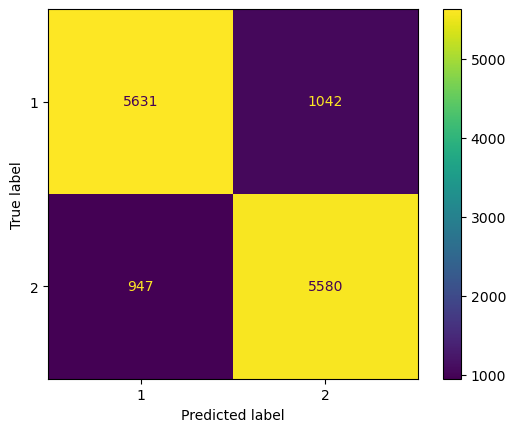

In [13]:
# Displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=BaseLR.classes_)
disp.plot()
plt.show()

# Sentiment analysis

## Predefinings

In [14]:
# Predefined Standard variables for countvectorizer and TfidTransformer
ngram_range = [(1,1),(1,2)]
use_idf = [True,False]

## Logistic Regression

In [25]:
# Making a Pipeline with Logistic Regression. Using CountVectorizer and TfidTransformer. 
pipeLR = Pipeline(steps=[
    ('preprocess', preProcess_Pipe),
    ('Model', LogisticRegression())
])

# Fitting the pipeline with data
pipeLR.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                                 ('TfidfTransformer', TfidfTransformer())])),
                ('Model', LogisticRegression())])

In [ ]:
# Pipeline for Logistic Regression
pipeLR = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
    ('Model', LogisticRegression())
])

# Fitting the pipeline with data
pipeLR.fit(X_train, y_train)

In [26]:
# Printing scores
print("Accuracy on training set: {:.3f}".format(pipeLR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeLR.score(X_test, y_test)))

Accuracy on training set: 0.909
Accuracy on test set: 0.849


In [20]:
# Pipeline together with gridsearchCV: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
# Defining parameters for the param grid
params = {
    'CountVectorizer__ngram_range':ngram_range,
    'TfidfTransformer__use_idf':use_idf,
    'Model__C':[0.01, 0.1, 1, 10, 100],
    'Model__max_iter':[10000]
}

# Defining grid search
search = GridSearchCV(
    pipeLR,
    param_grid=params,
    cv=2,
    verbose = 1.5 # To track the progress
)

# Fitting the grid search
search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                                       ('TfidfTransformer', TfidfTransformer()),
                                       ('Model', LogisticRegression())]),
             param_grid={'CountVectorizer__ngram_range': [(1, 1), (1, 2)],
                         'Model__C': [0.01, 0.1, 1, 10, 100],
                         'Model__max_iter': [10000],
                         'TfidfTransformer__use_idf': [True, False]})

In [21]:
# Printing results
print("Accuracy on training set: {:.3f}".format(search.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(search.score(X_test, y_test)))
print("Best params: ", search.best_params_) # Printing the best params

Accuracy on training set: 1.000
Accuracy on test set: 0.885
Best params:  {'CountVectorizer__ngram_range': (1, 2), 'Model__C': 100, 'Model__max_iter': 10000, 'TfidfTransformer__use_idf': True}


## MLP

In [15]:
# Defining pipe for MLP
pipeMLP = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
    ('Model', MLPClassifier())
])

# Fitting the pipeline with the data
pipeMLP.fit(X_train, y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('TfidfTransformer', TfidfTransformer()),
                ('Model', MLPClassifier())])

In [16]:
# Printing scores on the simple version of the model
print("Accuracy on training set: {:.3f}".format(pipeMLP.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeMLP.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.823


In [17]:
# Defining parameters for the param grid. Very intensive when it comes to computing time
params = {
    'CountVectorizer__ngram_range':ngram_range,
    'TfidfTransformer__use_idf':use_idf,
    'Model__activation':['tanh','relu'],
    #'Model__solver':['lbfgs'],
    'Model__hidden_layer_sizes':[50,100],
    'Model__max_iter':[10000]
}

# Defining grid search with the pipeline
searchMLP = GridSearchCV(
    pipeMLP,
    param_grid=params,
    cv=2,
    verbose = 1.5
)

# Fitting the grid search
searchMLP.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=tanh, Model__hidden_layer_sizes=50, Model__max_iter=10000, TfidfTransformer__use_idf=True; total time= 3.4min
[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=tanh, Model__hidden_layer_sizes=50, Model__max_iter=10000, TfidfTransformer__use_idf=True; total time= 3.3min
[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=tanh, Model__hidden_layer_sizes=50, Model__max_iter=10000, TfidfTransformer__use_idf=False; total time= 4.9min
[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=tanh, Model__hidden_layer_sizes=50, Model__max_iter=10000, TfidfTransformer__use_idf=False; total time= 4.5min
[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=tanh, Model__hidden_layer_sizes=100, Model__max_iter=10000, TfidfTransformer__use_idf=True; total time= 5.6min
[CV] END CountVectorizer__ngram_range=(1, 1), Model__activation=ta

In [ ]:
# Printing results for MLP
print("Accuracy on training set: {:.3f}".format(searchMLP.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(searchMLP.score(X_test, y_test)))
print("Best params: ", searchMLP.best_params_) # Printing the best params

## Naive Bayes

In [37]:
# Defining pipe for Naive Bayes
pipeNB = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
    ('Model', MultinomialNB())
])

# Fitting the pipeline with the data
pipeNB.fit(X_train, y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('TfidfTransformer', TfidfTransformer()),
                ('Model', MultinomialNB())])

In [38]:
# Printing scores on the simple version of the model
print("Accuracy on training set: {:.3f}".format(pipeNB.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeNB.score(X_test, y_test)))

Accuracy on training set: 0.891
Accuracy on test set: 0.812


In [41]:
# Defining parameters for the param grid
params = {
    'CountVectorizer__ngram_range':ngram_range,
    'TfidfTransformer__use_idf':use_idf,
    'Model__alpha':[1] # other parameters to be defined
}

# Defining grid search with the pipeline
searchNB = GridSearchCV(
    pipeNB,
    param_grid=params,
    cv=2
)

# Fitting the grid search
searchNB.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                                       ('TfidfTransformer', TfidfTransformer()),
                                       ('Model', MultinomialNB())]),
             param_grid={'CountVectorizer__ngram_range': [(1, 1), (1, 2)],
                         'Model__alpha': [1],
                         'TfidfTransformer__use_idf': [True, False]})

In [42]:
# Printing results for MultinominalNB
print("Accuracy on training set: {:.3f}".format(searchNB.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(searchNB.score(X_test, y_test)))
print("Best params: ", searchNB.best_params_) # Printing the best params

Accuracy on training set: 0.967
Accuracy on test set: 0.850
Best params:  {'CountVectorizer__ngram_range': (1, 2), 'Model__alpha': 1, 'TfidfTransformer__use_idf': True}


## Random Forrest

In [32]:
# Defining pipe for Random Forrest
pipeRF = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
    ('Model', RandomForestClassifier())
])

# Fitting the pipeline with the data
pipeRF.fit(X_train, y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('TfidfTransformer', TfidfTransformer()),
                ('Model', RandomForestClassifier())])

In [33]:
# Printing scores on the simple version of the model
print("Accuracy on training set: {:.3f}".format(pipeRF.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeRF.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.816


In [34]:
# Defining parameters for the param grid
params = {
    'CountVectorizer__ngram_range':ngram_range,
    'TfidfTransformer__use_idf':use_idf,
    'Model__n_estimators':[50,100,150], # other parameters to be defined
    'Model__max_depth':[5,10],
    'Model__min_samples_leaf':[5,10],
    'Model__random_state':[42]
}

# Defining grid search with the pipeline
searchRF = GridSearchCV(
    pipeRF,
    param_grid=params,
    cv=2,
)

# Fitting the grid search
searchRF.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                                       ('TfidfTransformer', TfidfTransformer()),
                                       ('Model', RandomForestClassifier())]),
             param_grid={'CountVectorizer__ngram_range': [(1, 1), (1, 2)],
                         'Model__max_depth': [5, 10],
                         'Model__min_samples_leaf': [5, 10],
                         'Model__n_estimators': [50, 100, 150],
                         'Model__random_state': [42],
                         'TfidfTransformer__use_idf': [True, False]})

In [36]:
# Printing results for Random Forrest
print("Accuracy on training set: {:.3f}".format(searchRF.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(searchRF.score(X_test, y_test)))
print("Best params: ", searchRF.best_params_) # Printing the best params

Accuracy on training set: 0.831
Accuracy on test set: 0.793
Best params:  {'CountVectorizer__ngram_range': (1, 2), 'Model__max_depth': 10, 'Model__min_samples_leaf': 5, 'Model__n_estimators': 150, 'Model__random_state': 42, 'TfidfTransformer__use_idf': False}


## Summarizing

In [ ]:
# Plotting the different accuracies and comparing them Got help from Chat GPT with this prompt: 
# "I have the following ML models where i want to plot the accuracy of each starting with the one with the highest accuracy:searchLR searchMLP searchNB searchRF"

# accuracy values in descending order
accuracies = [searchRF.best_score_, searchMLP.best_score_, searchNB.best_score_, searchLR.best_score_]

# model names in the same order as accuracies
model_names = ["Random Forest", "MLP", "Naive Bayes", "Logistic Regression"]

# plot horizontal bar chart
plt.barh(model_names, accuracies)

# add axis labels and title
plt.xlabel("Accuracy")
plt.title("Accuracy of ML models")

# show plot
plt.show()

In [ ]:
# accuracy values on test set in descending order
accuracies = [searchRF.best_estimator_.score(X_test, y_test),
              searchMLP.best_estimator_.score(X_test, y_test),
              searchNB.best_estimator_.score(X_test, y_test),
              searchLR.best_estimator_.score(X_test, y_test)]

# model names in the same order as accuracies
model_names = ["Random Forest", "MLP", "Naive Bayes", "Logistic Regression"]

# plot horizontal bar chart
plt.barh(model_names, accuracies)

# add axis labels and title
plt.xlabel("Accuracy on test set")
plt.title("Accuracy of ML models on test set")

# show plot
plt.show()

# Experiment

In [ ]:
# Making a function for pipelines with gridsearch.
def fullPipeGrid(name, model, params):
    pipe = Pipeline(steps=[
        'vect',CountVectorizer(),
        'trans',TfidfTransformer(),
        'Model', model()
    ])

    # Parameters for countvectorizer and tfid transformer are fixed. We test for uni-, bi- and trigrams.
    paramsVect = {
        'CountVectorizer__ngram_range':[(1,1),(1,2),(1,3)],
        'TfidfTransformer__use_idf':[True,False],
    }

    paramsModel ={
        'model'
    }

    # Making the GridSearch
    grid = GridSearchCV(
        pipe,
        param_grid=params,
        cv = 2 # CV on 2, while building the code
    )
    grid.fit(X_train, y_train)
    print(name)
    print("Accuracy on training set: {:.3f}".format(grid.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(grid.score(X_test, y_test)))
    print("Best params: ", grid.best_params_) # Printing the best params
    print(" ")


SyntaxError: invalid syntax (2699255659.py, line 14)

In [ ]:
# Creating the preprocessing steps to be used in all pipelines. https://towardsdatascience.com/a-basic-introduction-to-pipelines-in-scikit-learn-bd4cee34ad95
preProcess_Steps = [
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
]

preProcess_Pipe = Pipeline(preProcess_Steps)

# If more steps to the preprocessing is necessary
#one_pipe = ColumnTransformer(transformers=[
#          ('preprocess', preProcess_Pipe),
#          ('anotherStep', insertVariable)
#          ] )